In [26]:
# Лабораторная работа


In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split

In [28]:
# загрузить данные

In [29]:
data = pd.read_csv('data.csv', sep=";")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1


In [30]:
#  провести первонвявльный анализ данных

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [31]:
data.shape

(1460, 81)

In [32]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.297945
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.457512
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,1.000000


In [33]:
# Предложить стратегию по работе  с пропущенными значениями в данных 

In [34]:
# посмотрим есть ли строки с большим количеством пропусков данных

count_none = data.apply(lambda x: len(x) - len(x.dropna()), axis=1)


In [35]:
count_none.value_counts()

4     635
5     501
3     132
10     60
6      58
9      32
2      16
11      7
8       5
7       5
15      4
14      3
1       2
dtype: int64

In [36]:
# 1. Переменные количества которых меньше 500 можно удалить,
#    Однако в данном датасете отсутствующие значения переменных показывают, что опции которые обозначают 
#    данные переменные отсутствуют. И принято решение заполнить пропущенные значение - 'NA' 


In [37]:
# 2. Заполнение
# MiscFeature -  object - заполним 'NA'
# Alley - object - заполним 'NA'
# Fence - object - заполним 'NA'
# PoolQC - object - заполним 'NA'
# LotFrontage -float64 - среднее
# MasVnrType - object - заполним самым распространенным (самое распространенное None)
# MasVnrArea - float64 - т.к. самое распространенное MasVnrType None, то заполняем отсутствуишие 0
# BsmtQual - object - заполним 'NA' 
# BsmtCond - object - заполним 'NA' 
# BsmtExposure - object - заполним 'NA' 
# BsmtFinType1 - object - заполним 'NA' 
# BsmtFinType2 - object - заполним 'NA' 
# Electrical - object - заполним самым распространенным 
# FireplaceQu - object - т.к. пропуски находятся в переменных где параметр  Fireplaces = 0, то заполним 'NA' 
# GarageType - object -  заполним 'NA' 
# GarageYrBlt - float64 - т.к. пропуски в строках, где количество гаражей = 0, то заполним 
#                        значением времени последней реконструкции из поля YearRemodAdd
# GarageFinish - object - заполним 'NA' 
# GarageQual - object - заполним 'NA' 
# GarageCond - object - заполним 'NA' 

In [38]:
# 2. Категориальные переменные
#2.2. Ординарные
# Переменые с оценкой заменить на оценку в виде числа

# 10 категорий
# OverallQual 10 уже закодированы
# OverallCond 10 уже закодированы

# 5 категорий 
# ExterQual 5  
# ExterCond 5
# HeatingQC 5
# KitchenQual 5
# PoolQC 5  


# BsmtExposure 5

# 6 категорий
# BsmtQual 6 
# BsmtCond 6
# FireplaceQu 6 
# GarageQual 6 
# GarageCond 6 

# 7 категорий 
# BsmtFinType1 7
# BsmtFinType2 7


In [39]:
# неординарные

In [40]:
# one hot encoding
# MiscFeature
# Fence
# Alley 
# Street
# LotShape
# LandContour
# Utilities
# LotConfig
# LandSlope
# BldgType
# MasVnrType
# Foundation
# Heating
# CentralAir
# Electrical
# PavedDrive

# woe
# MSZoning
# MSSubClass
# Neighborhood
# Condition1
# Condition2
# HouseStyle
# RoofStyle
# RoofMatl
# Exterior1st
# Exterior2nd
# Functional
# GarageType
# GarageFinish
# MiscFeature
# SaleType
# SaleCondition

In [41]:
# Функции для заполнения дванных и кодировки категориальных переменных.

In [42]:
# Заполнить средними значениеми
def put_mean_to_na_param(dataset, list_columns):
    for i in list_columns:
        dataset[i].fillna(dataset[i].mean(), inplace=True)

In [43]:
# Заполнить значением
def put_value_to_na_param(dataset, list_columns, value=0 ):
    for i in list_columns:
        dataset[i].fillna(value, inplace=True)

In [44]:
# Заполнить самым распространенным значением
def put_most_common_meaning_to_na_param(dataset, list_columns):
    for i in list_columns:
        dataset[i].fillna(dataset[i].value_counts()[0], inplace=True)

In [45]:
# Заполнить значения NaN значениеями из другой колонки
def put_param_from_col_src_to_na_param(dataset, col_dest, col_src): 
    dataset[col_dest]=dataset.apply(lambda x: x[col_src] if x[col_dest] is not None else x[col_dest], axis=1 )
            

In [46]:
# Закодировать nominal категориальную переменную с помощью "one hot encoding"  (используем реализацию из лекций)
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [125]:
# Закодировать nominal категориальную переменную с помощью "WOE"   (используем реализацию из лекций)
#def get_woe_v1_for_test(df_train, df_test, col, target_col):
 #   all_one = df_train[col].value_counts() / df_train[col].value_counts()
 #   all_good = len(df_train[df_train[target_col] == 1][col])+0.5
 #   all_bad = len(df_train[df_train[target_col] == 0][col])+0.5
 #   #print('WOE:',len(df_train[df_train[target_col] == 1][col]),len(df_train[df_train[target_col] == 0]),col, all_good, all_bad)
 #   odds_series = (
 #
 #       (((all_one*df_train[df_train[target_col] == 0][col].value_counts()).fillna(0)/(all_bad))+0.5)
 #   )
 #   #print('odds_series',odds_series)
 # category_woe_dict = np.log(odds_series).to_dict()
 #   #print(category_woe_dict)
 #   df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
 #   return df_test
#
def get_woe_v1(df_train, df_test, col, target_col):
    all_one = df_train[col].value_counts() / df_train[col].value_counts()
    all_good = len(df_train[df_train[target_col] == 1][col])
    all_bad = len(df_train[df_train[target_col] == 0][col])
    odds_series = (
        (((all_one*df_train[df_train[target_col] == 1][col].value_counts()).fillna(0)+0.5)/all_good)
        /
        (((all_one*df_train[df_train[target_col] == 0][col].value_counts()).fillna(0)+0.5)/all_bad)
    )
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    return df_train, df_test


#def get_folds(dataset, count_fold):
#    num =  np.random.randint(count_fold, size=len(dataset))
#    res = []
#    for i in range(count_fold):
#        res.append(dataset[num == i])
#    return res


def get_woe_cols(df_train, df_test, cols, target_col):
    #k_fold = 5
    #data_fold = get_folds(dataset, k_fold)
    res = [] 
   
    #for i in range(k_fold):
     #   train = data_fold[:i]+data_fold[i+1: k_fold]
    for col in cols:
        df_train, df_test = get_woe_v1(df_train, df_test, col, target_col)
        
    
    return df_train, df_test

In [126]:
# Закодировать ordered категориальную переменную используя числовой порядок
def get_ordered_col(dataset, col, dict_col_params):
    """
    В функцию передается датасет, имя колонки и словарь {'значение_параметра_в_колонке': числовое_значение_для_замены }
    """
    dataset[col + 'order'] = dataset.apply(lambda x: dict_col_params[x[col]],axis=1)
    return dataset

In [127]:
def get_ordered_cols(dataset, cols, dict_col_params):
    for col in cols:
        res = get_ordered_col(dataset, col, dict_col_params)
    return res.drop(columns=cols)        

In [128]:
dict_label_5_1 = {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0}
dict_label_5_2 = {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'NA': 0}
dict_label_5_3 = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0} 
dict_label_6_1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
dict_label_7_1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0} 


In [129]:
# функция подготовки данных
def get_data(dataset):
    
    # заполняем пропуски
    put_value_to_na_param(dataset, ['MiscFeature','Alley','Fence','BsmtQual','PoolQC','BsmtCond',\
                                    'BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',\
                                    'GarageType','GarageFinish','GarageQual','GarageCond'], 'NA' )
    
    put_value_to_na_param(dataset, ['MasVnrArea'], 0)
    put_value_to_na_param(dataset, ['MasVnrType'], 'none')                      
    put_mean_to_na_param(dataset, ['LotFrontage'])
    put_most_common_meaning_to_na_param(dataset, ['Electrical'])   
    put_param_from_col_src_to_na_param(dataset, 'GarageYrBlt', 'YearRemodAdd')     
    data_raw = dataset.copy()
    data_raw = get_one_hot(dataset, ['MiscFeature', 'Fence', 'Alley', 'Street', 'LotShape', 'LandContour', 'Utilities',\
                                'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'Foundation', 'Heating', \
                                'CentralAir', 'Electrical', 'PavedDrive'])
    
    data_raw = get_ordered_cols(data_raw, ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual'], dict_label_5_1)
    data_raw = get_ordered_cols(data_raw, ['PoolQC'], dict_label_5_2)
    data_raw = get_ordered_cols(data_raw, ['BsmtExposure'], dict_label_5_3)
    data_raw = get_ordered_cols(data_raw, ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond'] , dict_label_6_1)
    data_raw = get_ordered_cols(data_raw, ['BsmtFinType1', 'BsmtFinType2'] , dict_label_7_1) 
    
    y = data_raw['SaleCategory'].copy()
    #data_raw= data_raw.drop(columns=['SaleCategory'])
    train, test, y_train, y_test = train_test_split(data_raw, y, test_size=0.2 ,random_state=42)
       
    train, test = get_woe_cols(train, test, ['MSZoning','MSSubClass','Neighborhood','Condition1',\
                                       'Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st',\
                                       'Exterior2nd','Functional','GarageType','GarageFinish',\
                                       'SaleType','SaleCondition'], \
                                      'SaleCategory')
    columns_to_drop = ['MSZoning','MSSubClass','Neighborhood','Condition1',\
                                  'Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st',\
                                  'Exterior2nd','Functional','GarageType','GarageFinish',\
                                  'SaleType','SaleCondition','MiscFeature', 'Fence', 'Alley',\
                                  'Street', 'LotShape', 'LandContour', 'Utilities',\
                                  'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', \
                                  'Foundation', 'Heating', 'CentralAir', 'Electrical', 'PavedDrive']
    
    train = train.drop(columns=columns_to_drop)
    test = test.drop(columns=columns_to_drop)
        
    
    return train, test, y_train, y_test
    
    
        

In [150]:
train_raw, test_raw, y_train, y_test = get_data(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [131]:
    col = 'Condition2'
    target_col = 'SaleCategory'
    df_train, df_test, y_train, y_test = train_test_split(data, data['SaleCategory'], test_size=0.2 ,random_state=42)
    all_one = df_train[col].value_counts() / df_train[col].value_counts()
    all_good = len(df_train[df_train[target_col] == 1])
    all_bad = len(df_train[df_train[target_col] == 0])
    print(all_one)
    print((all_one*df_train[df_train[target_col] == 1][col].value_counts()).fillna(0.5))
    odds_series = (
        (((all_one*df_train[df_train[target_col] == 1][col].value_counts()).fillna(0)+0.5)/all_good)
        /
        (((all_one*df_train[df_train[target_col] == 1][col].value_counts()).fillna(0)+0.5)/all_bad)
    )
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    df_train[col + '_woe'].value_counts()
    #len(df_train[df_train[target_col] == 1])
    #len(df_train[df_train[target_col] == 0])

Norm      1.0
Feedr     1.0
Artery    1.0
PosN      1.0
RRNn      1.0
RRAe      1.0
RRAn      1.0
PosA      1.0
Name: Condition2, dtype: float64
Artery      0.5
Feedr       0.5
Norm      351.0
PosA        1.0
PosN        1.0
RRAe        0.5
RRAn        0.5
RRNn        0.5
Name: Condition2, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0.83672    1165
0.83672       3
Name: Condition2_woe, dtype: int64

In [101]:
data['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [132]:
train_raw.shape

(1168, 131)

In [137]:
train_raw.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,HouseStyle_woe,RoofStyle_woe,RoofMatl_woe,Exterior1st_woe,Exterior2nd_woe,Functional_woe,GarageType_woe,GarageFinish_woe,SaleType_woe,SaleCondition_woe
254,255,70.0,8400,5,6,1957,1957,0.0,922,0,...,-0.059673,-0.148915,-0.012649,-1.292155,-1.239337,0.071489,0.460590,0.558468,-0.147958,-0.121663
1066,1067,59.0,7837,6,7,1993,1994,0.0,0,0,...,0.670131,-0.148915,-0.012649,0.874729,0.904873,0.071489,0.460590,0.558468,-0.147958,-0.121663
638,639,67.0,8777,5,7,1910,1950,0.0,0,0,...,-0.059673,-0.148915,-0.012649,-1.292155,-1.068507,0.071489,-2.908855,-2.908855,-0.147958,-0.121663
799,800,60.0,7200,5,7,1937,1950,252.0,569,0,...,-1.247340,-0.148915,-0.012649,-1.109190,-1.068507,0.071489,-1.807550,-1.351298,-0.147958,-0.121663
380,381,50.0,5000,5,6,1924,1950,0.0,218,0,...,-1.247340,-0.148915,-0.012649,0.739082,-1.068507,0.071489,-1.807550,-1.351298,-0.147958,-0.121663


In [134]:
corr = train_raw.drop(columns=['Id']).corr()

corr2 =  corr[:40]


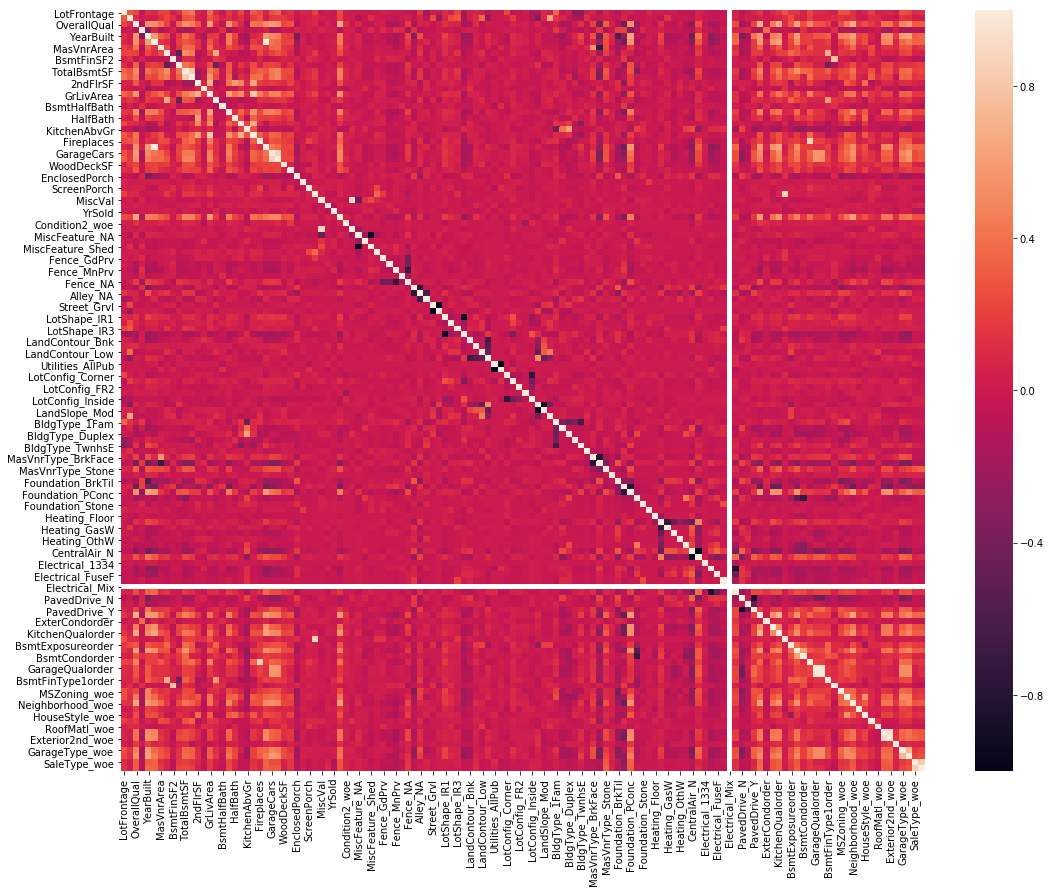

In [135]:
matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(corr)

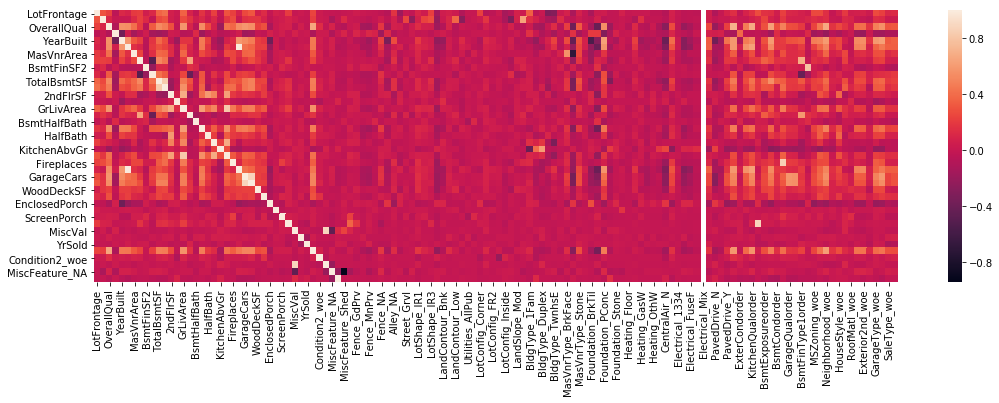

In [136]:
matplotlib.pyplot.figure(figsize=(18, 5))
sns.heatmap(corr2)

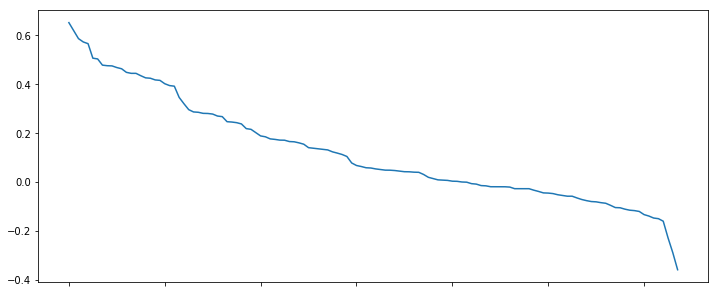

In [141]:
matplotlib.pyplot.figure(figsize=(12, 5))
corr_target = corr['SaleCategory'].sort_values(ascending=False)
corr_target[1:].plot()

In [142]:
corr_target

SaleCategory         1.000000
OverallQual          0.652017
Neighborhood_woe     0.619578
ExterQualorder       0.586670
KitchenQualorder     0.573014
GrLivArea            0.566006
GarageCars           0.506682
GarageArea           0.503532
TotalBsmtSF          0.478186
BsmtQualorder        0.475831
FullBath             0.475064
Foundation_PConc     0.468328
1stFlrSF             0.463352
YearBuilt            0.448674
YearRemodAdd         0.444594
GarageYrBlt          0.444594
GarageFinish_woe     0.434914
Exterior1st_woe      0.426178
Exterior2nd_woe      0.424602
TotRmsAbvGrd         0.417714
MSSubClass_woe       0.415854
FireplaceQuorder     0.402172
GarageType_woe       0.394560
HeatingQCorder       0.392076
Fireplaces           0.346341
MasVnrArea           0.320382
OpenPorchSF          0.296100
BsmtExposureorder    0.286704
MasVnrType_Stone     0.285338
HouseStyle_woe       0.280971
                       ...   
MiscFeature_Shed    -0.044485
LandContour_Lvl     -0.045233
Heating_Gr

In [176]:

train_not_scaled = train_raw.drop(columns=['Id', 'SaleCategory'])
test_not_scaled = test_raw.drop(columns=['Id', 'SaleCategory']).fillna(0)


In [179]:
test_not_scaled.isnull().sum().sum()

0

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train_not_scaled)
test = sc.transform(test_not_scaled)

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8).fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)

In [200]:
test_pca.shape

(292, 51)

Text(0,0.5,'explained_variance_ratio_')

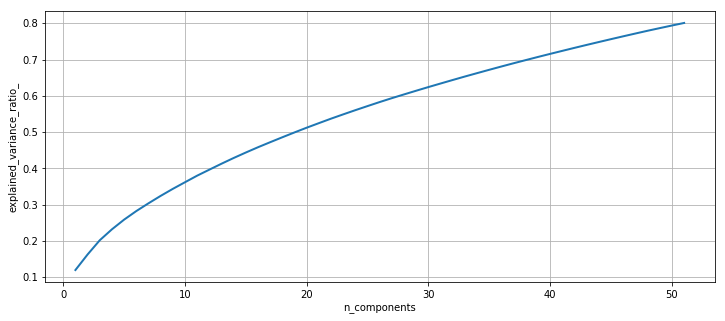

In [182]:

import matplotlib.pyplot as plt
matplotlib.pyplot.figure(figsize=(12, 5))
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [183]:

from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000)


In [184]:
clf.fit(train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [185]:
result = clf.predict(test)

In [186]:
from sklearn.metrics import roc_auc_score, roc_curve

In [187]:
roc_auc_score(result,y_test )

0.9207477619799894

In [201]:
clf.fit(train_pca, y_train)
result = clf.predict(test_pca)
roc_auc_score(result,y_test )

0.9006755464916194

In [188]:
import xgboost

xgb = xgboost.XGBClassifier(max_depth=3, n_jobs=-1)
xgb.fit(train, y_train)
y_train_predict = xgb.predict_proba(train)[:, 1]
y_test_predict = xgb.predict_proba(test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)


Train:  1.0
Test:  0.99


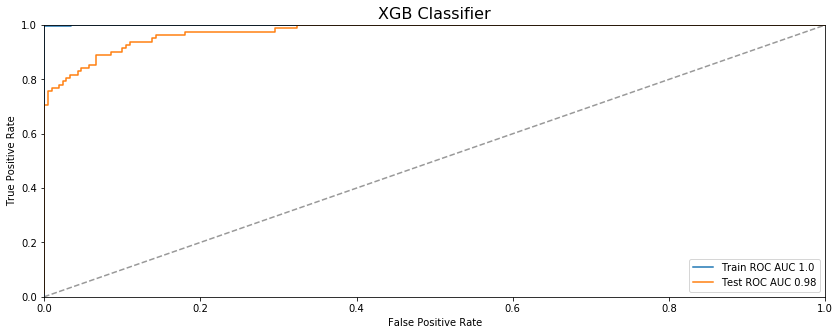

In [204]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (14.0, 5.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

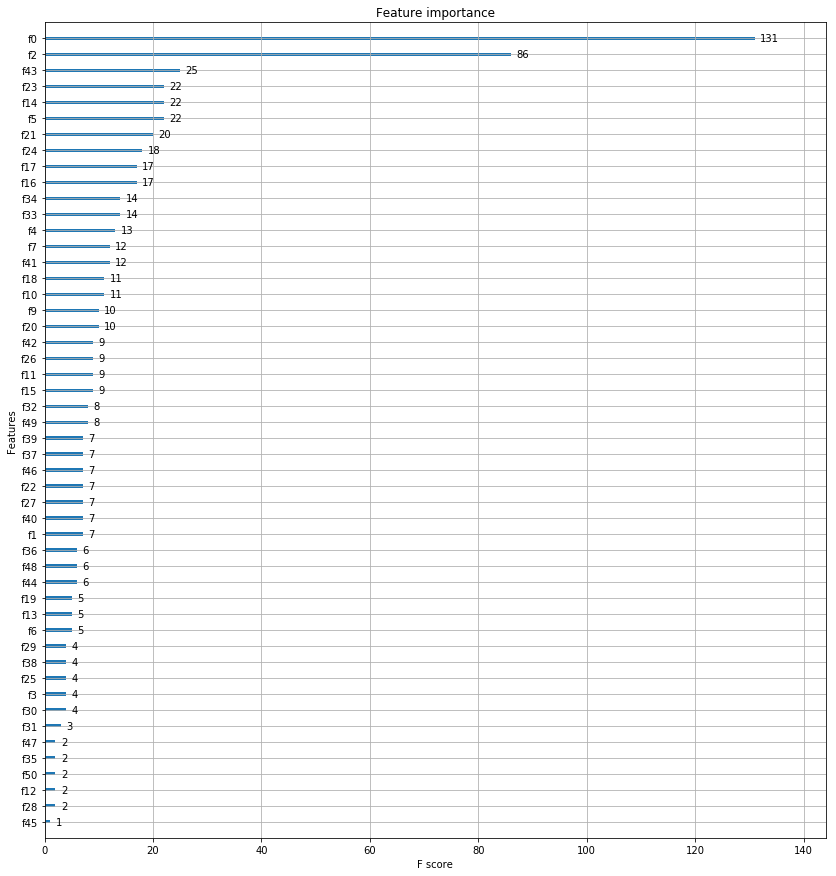

In [206]:
matplotlib.rcParams['figure.figsize'] = (14, 15)
xgboost.plot_importance(booster=xgb)
plt.savefig('lab_tree_importance_test.png')

In [202]:

xgb.fit(train_pca, y_train)
y_train_predict = xgb.predict_proba(train_pca)[:, 1]
y_test_predict = xgb.predict_proba(test_pca)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.98


In [191]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [195]:
y_pred = clf.predict(test)


In [196]:
roc_auc_score(y_pred,y_test)

0.9148689605990372

In [207]:
clf.fit(train_pca, y_train) 
y_pred = clf.predict(test_pca)
roc_auc_score(y_pred,y_test)


0.9006755464916194